# Data Cleaning and Feature Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='whitegrid')

## 1. Data Cleaning

### Simple Imputer - `SimpleImputer()`

#### Example 1

In [12]:
from sklearn.impute import SimpleImputer

X = np.array([[7, 1], [None, 8], [2, None], [9, 6]])
si = SimpleImputer(strategy='mean', add_indicator=True) # add_indicator flag adds one column per missing value, and indicates the missing value in the corresponding row by a 1.

si.fit_transform(X)

array([[7., 1., 0., 0.],
       [6., 8., 1., 0.],
       [2., 5., 0., 1.],
       [9., 6., 0., 0.]])

#### Example 2

In [16]:
cols = ["age","sex","cp","trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
heart_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", encoding='utf-8', header=None, names=cols)
heart_data
# heart_data.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [18]:
heart_data["ca"].unique().

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [21]:
heart_data["thal"].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [24]:
heart_data[heart_data["ca"] == '?']['ca'].count()

4

In [25]:
heart_data[heart_data["thal"] == '?']['thal'].count()

2

In [27]:
heart_data.replace("?", np.nan, inplace=True)

In [31]:
si = SimpleImputer(strategy='mean')
res = si.fit_transform(heart_data)


(303, 14)

### KNN ( K Nearest Neighbours ) Imputer - `KNNInputer()`

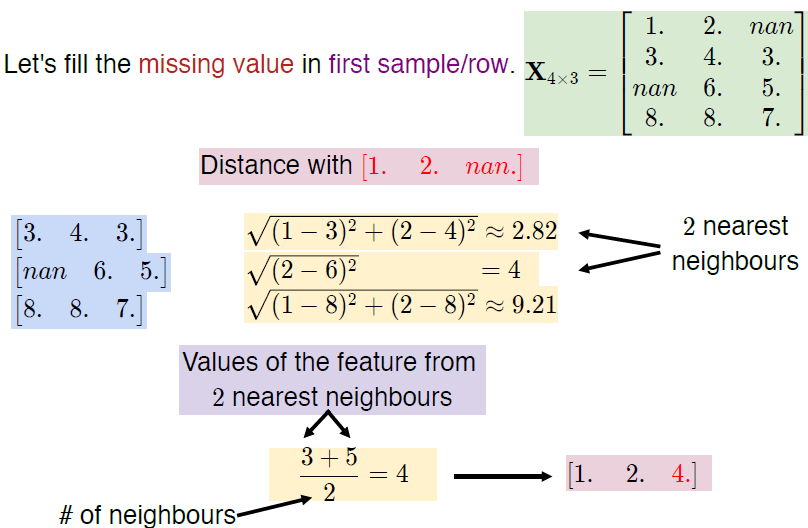

In [34]:
from sklearn.impute import KNNImputer

In [35]:
X = np.array([[1, 2, None], [3, 4, 3], [None, 6, 5], [8, 8, 7]])
knn = KNNImputer(n_neighbors=2, weights='uniform')
knn.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [36]:
from sklearn.impute import MissingIndicator

In [40]:
X = np.array([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
ind = MissingIndicator()
print(X)
print("\n", ind.fit_transform(X))

[[ 1.  2. nan]
 [ 3.  4.  3.]
 [nan  6.  5.]
 [ 8.  8.  7.]]

 [[False  True]
 [False False]
 [ True False]
 [False False]]


In [41]:
cols = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
abalone_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, encoding='utf-8', names=cols)
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [42]:
abalone_data["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [48]:
abalone_data = abalone_data.replace({ 
    'Sex' : {
        'M' : 1,
        'F' : 2,
        'I' : 3
    }
})

# abalone_data.pop("Rings")

In [50]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


<AxesSubplot:ylabel='Density'>

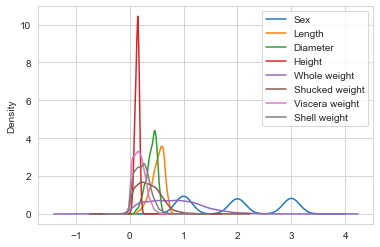

In [66]:
abalone_data.plot.kde()

<AxesSubplot:>

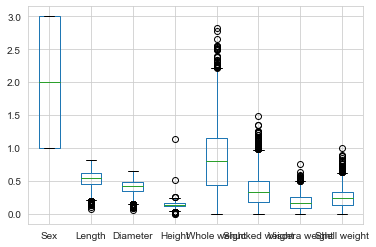

In [52]:
abalone_data.boxplot()

## 2. Feature Extraction

In [83]:
from sklearn.feature_extraction import DictVectorizer
data = [{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]

dv = DictVectorizer(sparse=False)
dv.fit_transform(data)

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [84]:
np.array(data)

array([{'age': 4, 'height': 96.0}, {'age': 1, 'height': 73.9},
       {'age': 3, 'height': 88.9}, {'age': 2, 'height': 81.6}],
      dtype=object)

In [85]:
pd.DataFrame(data)

,age,height
0,4,96.0
1,1,73.9
2,3,88.9
3,2,81.6
